In [307]:
from round import lc
import matplotlib.pyplot as pl
import glob

%matplotlib inline

pl.rc('xtick', labelsize=20)
pl.rc('ytick', labelsize=20)
pl.rc('axes', labelsize=25)
pl.rc('axes', titlesize=30)
pl.rc('legend', handlelength=3)
pl.rc('legend', fontsize=20)

files = glob.glob("../light_curves/*.fits")
i = 0

# 38, 62

15


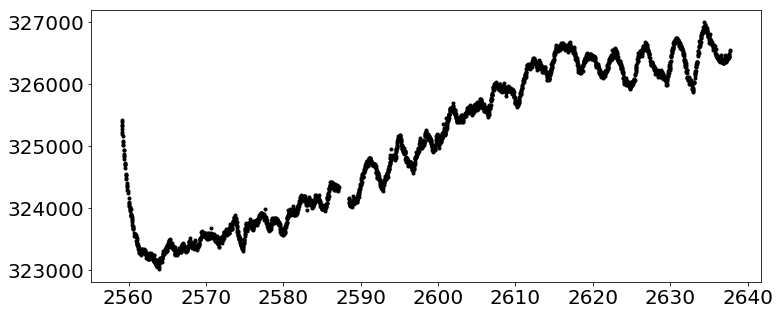

In [324]:
i += 1
light_curve = lc.LightCurve.everest(files[i])
print(i)

fig = pl.figure(figsize=(12, 5))
light_curve.plot_raw(fig.gca(), 'k.')

In [325]:
light_curve.compute(mcmc=True, mcmc_draws=500, tune=500, 
                    target_accept=0.9, prior_sig=3.0, 
                    with_SHOTerm=False, cores=2)

There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/site-packages/pymc3/stats.py:974: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


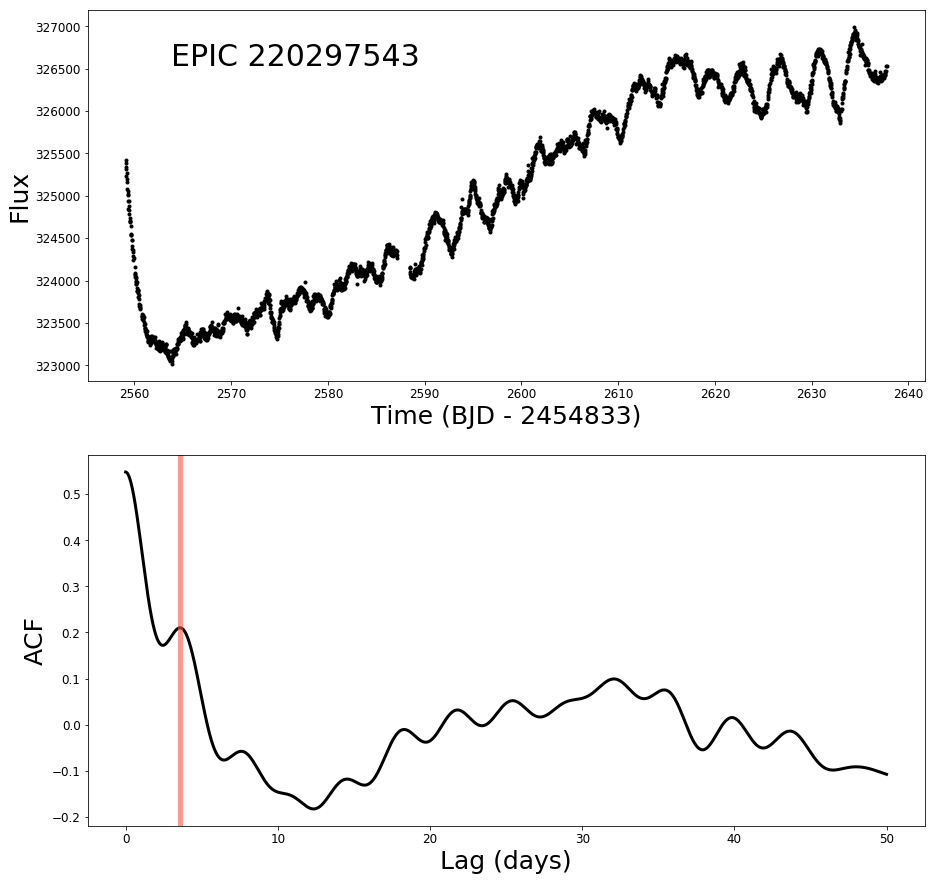

In [331]:
fig, axs = pl.subplots(2, 1, figsize=(15, 15))
#light_curve.plot_trend(axs[0], linewidth=3, color="#f55649", label="third order polynomial fit")
light_curve.plot_raw(axs[0], 'k.')
#fig.gca().plot(light_curve.raw_t[light_curve.masked], light_curve.raw_flux[light_curve.masked], 
#               'r.', label="masked outliers")

pl.rc('xtick', labelsize=20)
pl.rc('ytick', labelsize=20)
pl.rc('axes', labelsize=35)
pl.rc('axes', titlesize=35)
pl.rc('legend', handlelength=3)
pl.rc('legend', fontsize=20)

#axs[0].set_title("Everest Light Curve for EPIC 220279363")
axs[0].annotate("EPIC {0}".format(light_curve.ident), xy=(0.1, 0.85), xycoords="axes fraction", fontsize=30)
axs[0].set_xlabel("Time (BJD - 2454833)")
axs[0].set_ylabel("Flux")

light_curve.plot_autocor(axs[1], "k", linewidth=3)
axs[1].set_ylabel("ACF")
axs[1].set_xlabel("Lag (days)")

pl.savefig("/Users/tgordon/Desktop/everest_{0}.pdf".format(i))

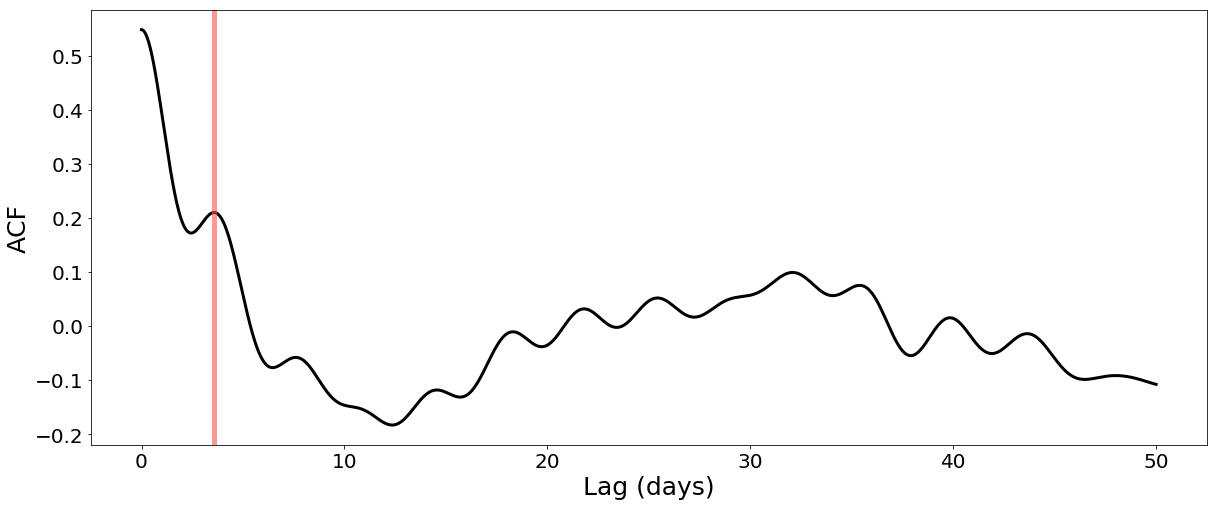

In [327]:
pl.rc('xtick', labelsize=20)
pl.rc('ytick', labelsize=20)
pl.rc('axes', labelsize=25)
pl.rc('axes', titlesize=30)
pl.rc('legend', handlelength=3)
pl.rc('legend', fontsize=20)

fig = pl.figure(figsize=(20, 8))
ax = fig.gca()
light_curve.plot_autocor(ax, "k", linewidth=3)
#ax.set_title("Autocorrelation Function for EPIC 220279363")
ax.set_ylabel("ACF")
ax.set_xlabel("Lag (days)")
pl.savefig("/Users/tgordon/Desktop/acf_63.png")

INFO (theano.gof.compilelock): Refreshing lock /Users/tgordon/.theano/compiledir_Darwin-19.0.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir/lock


Text(0,0.5,'Normalized Flux')

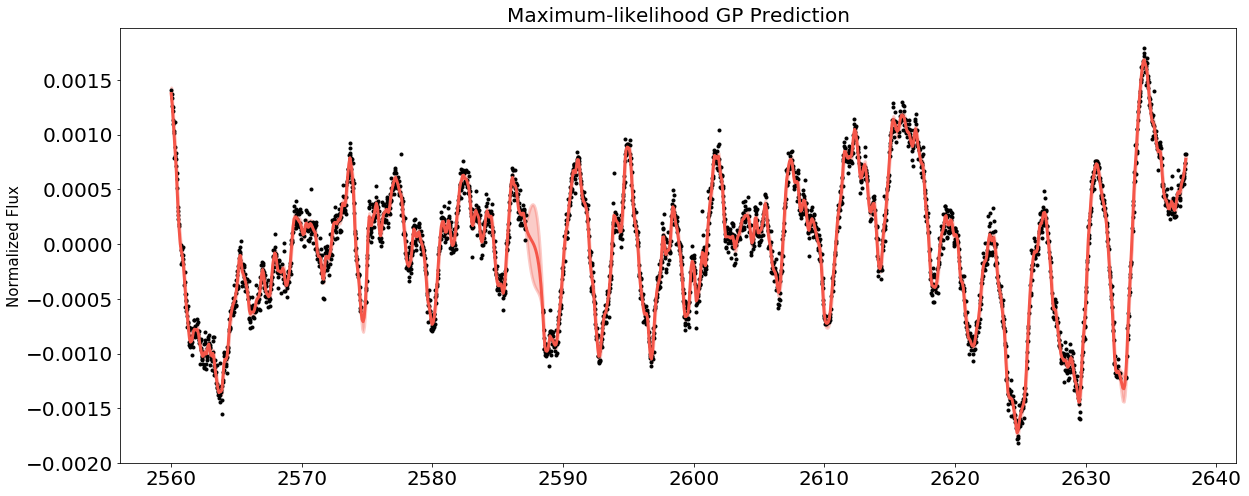

In [328]:
fig = pl.figure(figsize=(20, 8))
ax = fig.gca()
light_curve.plot(ax, 'k.', label="normalized everest flux")
light_curve.plot_map_soln(ax, t=np.linspace(light_curve.t[0], light_curve.t[-1], 1000), 
                              linewidth=3, 
                              color="#f55649", 
                              label="GP prediction")
ax.set_title("Maximum-likelihood GP Prediction", fontsize=20)
ax.set_ylabel("Normalized Flux", fontsize=15)

/usr/local/lib/python3.7/site-packages/pymc3/stats.py:974: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


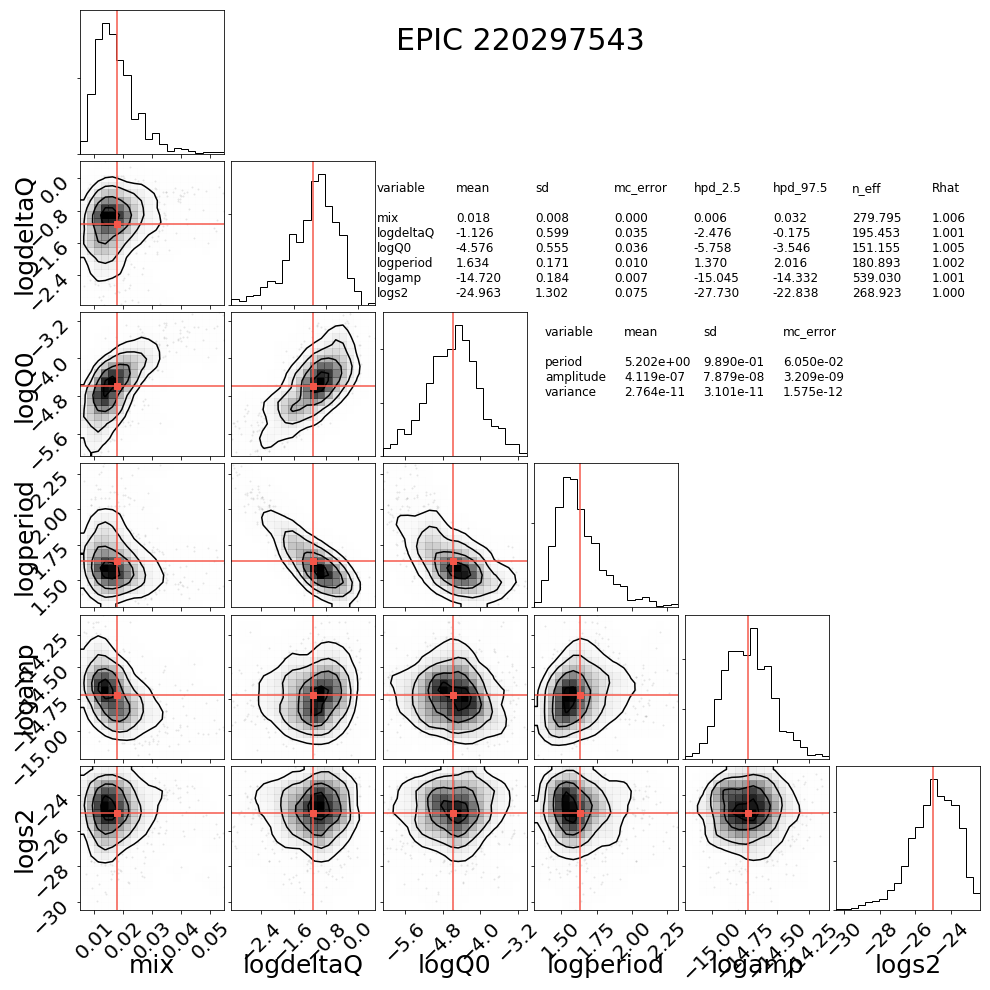

In [329]:
light_curve.plot_corner(smooth=True, 
                        truths=light_curve.mcmc_summary["mean"].values, 
                        truth_color="#f55649");

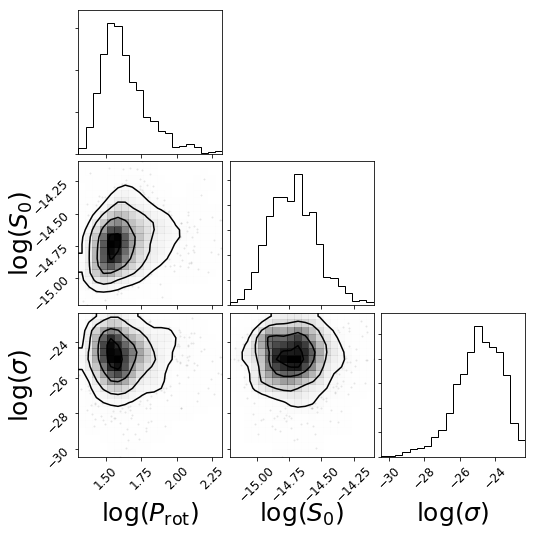

In [330]:
import pymc3 as pm
import corner

pl.rc('xtick', labelsize=12)
pl.rc('ytick', labelsize=12)
pl.rc('axes', labelsize=25)
pl.rc('axes', titlesize=30)
pl.rc('legend', handlelength=3)
pl.rc('legend', fontsize=20)

samples = pm.trace_to_dataframe(light_curve.trace, varnames=["logperiod", "logamp", "logs2"])
corn = corner.corner(samples, smooth=1, labels=[r"$\log(P_\mathrm{rot})$", r"$\log(S_0)$", r"$\log(\sigma)$"])
#pl.annotate("EPIC {0}".format(light_curve.ident), xy=(0.4, 0.95), xycoords="figure fraction", fontsize=30)
pl.savefig("/Users/tgordon/Desktop/corner_{0}.pdf".format(i))